<a href="https://colab.research.google.com/github/arunmozhidevan/MDS271-Machine-Learning/blob/main/Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description**

**About Dataset**<br>
Extraction was done by Barry Becker from the 1994 Census database.<br><br>
Prediction task is to determine whether a person makes over 50K a year.<br><br>

**Columns are:**<br>
**age**: continuous.<br>
**workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.<br>
**fnlwgt**: continuous.<br>
**education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.<br>
**education-num**: continuous.<br>
**marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.<br>
**occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.<br>
**relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.<br>
**race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.<br>
**sex**: Female, Male.<br>
**capital-gain**: continuous.<br>
**capital-loss**: continuous.<br>
**hours-per-week**: continuous.<br>
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.<br>
**salary**: <=50K or >50K

# Install packages

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import Packages

In [ ]:
import opendatasets as od
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mo
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, RandomForestClassifier
import pickle

In [ ]:
od.download("https://www.kaggle.com/datasets/ayessa/salary-prediction-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: arunmozhidevan
Your Kaggle Key: ··········


100%|██████████| 460k/460k [00:00<00:00, 39.5MB/s]

Downloading dataset from kaggle using user and key

# Importing dataset

In [ ]:
data = pd.read_csv('/content/salary-prediction-classification/salary.csv')

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'sex', 'capital-gain', 'capital-loss', 'salary'],
      dtype='object')

Seeing all the columns

In [ ]:
data.select_dtypes('int').columns

Index(['age', 'capital-gain', 'capital-loss'], dtype='object')

Selecting only integer colums

In [ ]:
temp = data.select_dtypes('object')
temp.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'sex', 'salary'],
      dtype='object')

Selecting only object colums

In [ ]:
for i in temp.columns:
  print(i,sorted(temp[i].unique()))

workclass [' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private', ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay']
education [' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate', ' HS-grad', ' Masters', ' Preschool', ' Prof-school', ' Some-college']
marital-status [' Divorced', ' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married', ' Separated', ' Widowed']
occupation [' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair', ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners', ' Machine-op-inspct', ' Other-service', ' Priv-house-serv', ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support', ' Transport-moving']
relationship [' Husband', ' Not-in-family', ' Other-relative', ' Own-child', ' Unmarried', ' Wife']
sex [' Female', ' Male']
salary [' <=50K', ' >50K']


In [ ]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Description of our dataset

In [ ]:
data.replace(' ?',np.nan, inplace=True)

replacing '?' as nan

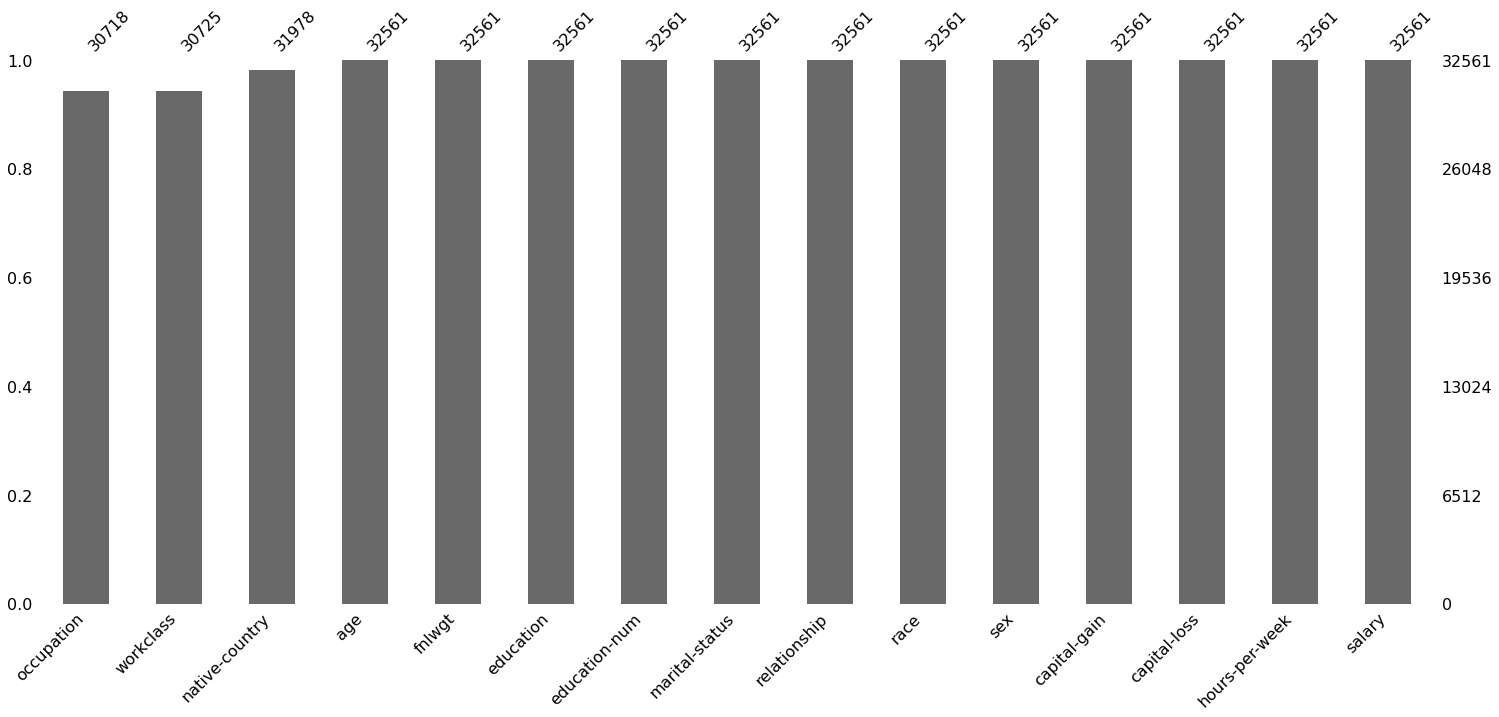

In [ ]:
mo.bar(data,sort="ascending")

Understanding the missing values using missingno package

In [ ]:
data.isna().sum().sort_values(ascending=False)

occupation        1843
workclass         1836
native-country     583
age                  0
fnlwgt               0
education            0
education-num        0
marital-status       0
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
salary               0
dtype: int64

Counting the NA values present in out dataset

In [ ]:
data.dropna(inplace=True)

Dropping all the na values since its only 0.03% present

In [ ]:
le = []
for i in data.select_dtypes(include='object').columns:
  temp = LabelEncoder()
  data[i] = temp.fit_transform(data[i])
  le.append(temp)

Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.

In [ ]:
le[0].classes_

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

LabelEncoding orginal values

In [ ]:
le[0].transform(le[0].classes_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

LabelEncoding transformed values

In [ ]:
sorted([(variance_inflation_factor(data.values, j), i) for i,j in zip(data.columns,range(len(data.columns)))])

[(1.0773271899440358, 'capital-loss'),
 (1.0807481376053676, 'capital-gain'),
 (1.6052262233074241, 'salary'),
 (2.379843237982945, 'relationship'),
 (3.5896165042860613, 'occupation'),
 (3.6865130953681393, 'marital-status'),
 (3.872357750651173, 'sex'),
 (6.565196072207119, 'education'),
 (6.589928722855536, 'age'),
 (7.544277431439026, 'workclass')]

Finding the Variance inflation factor, the ratio of the variance of estimating some parameter in a model that includes multiple other terms by the variance of a model constructed using only one term. It quantifies the severity of multicollinearity in an ordinary least squares regression analysis.

In [ ]:
data.drop(columns=['native-country', 'education-num', 'race', 'hours-per-week', 'fnlwgt'], inplace=True)

Removing columns having large VIF values

In [ ]:
y = data.iloc[:,-1]
X = data.iloc[:,:-1]

Assigning Input variables and target variable

# Splitting the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

The train-test split is used to estimate the performance of machine learning algorithms that are applicable for prediction-based Algorithms/Applications. This method is a fast and easy procedure to perform such that we can compare our own machine learning model results to machine results.

# Standardization

In [ ]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train) 
X_test = ss.transform(X_test) 

Standardization or Z-Score Normalization is the transformation of features by subtracting from mean and dividing by standard deviation. This is often called as Z-score.

# Modelling

## Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
confusion_matrix(y_test, lr.predict(X_test)), accuracy_score(y_test, lr.predict(X_test)), f1_score(y_test, lr.predict(X_test))

(array([[7912,  284],
        [1807,  743]]), 0.8054159687325516, 0.41543192619513564)

## Naive Bayes

In [ ]:
# nb_classifier = GaussianNB()

# params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
# gs_NB = GridSearchCV(estimator=nb_classifier, 
#                  param_grid=params_NB, 
#                  cv=5,  
#                  verbose=1, 
#                  scoring='accuracy') 
# gs_NB.fit(X_train, y_train)

# gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 1e-05}

In [ ]:
# lr = GaussianNB()
# lr.fit(X_train, y_train)
# confusion_matrix(y_test, lr.predict(X_test)), accuracy_score(y_test, lr.predict(X_test)), f1_score(y_test, lr.predict(X_test))

(array([[7050,  390],
        [1730,  784]]), 0.7870202933494073, 0.42516268980477223)

In [ ]:
lr = GaussianNB(var_smoothing=1e-05)
lr.fit(X_train, y_train)
confusion_matrix(y_test, lr.predict(X_test)), accuracy_score(y_test, lr.predict(X_test)), f1_score(y_test, lr.predict(X_test))

(array([[7077,  363],
        [1734,  780]]), 0.7893309222423146, 0.42657916324856443)

## Random Forest 

In [ ]:
lr = RandomForestClassifier()
lr.fit(X_train, y_train)
confusion_matrix(y_test, lr.predict(X_test)), accuracy_score(y_test, lr.predict(X_test)), f1_score(y_test, lr.predict(X_test))

(array([[6773,  667],
        [ 936, 1578]]), 0.8389592123769339, 0.6631645303635217)

## SVM

In [ ]:
lr = SVC()
lr.fit(X_train, y_train)
confusion_matrix(y_test, lr.predict(X_test)), accuracy_score(y_test, lr.predict(X_test)), f1_score(y_test, lr.predict(X_test))

(array([[7269,  171],
        [1724,  790]]), 0.8096242716495881, 0.4546762589928057)

## KNeighbors

In [ ]:
lr = KNeighborsClassifier(n_neighbors=5)
lr.fit(X_train, y_train)
confusion_matrix(y_test, lr.predict(X_test)), accuracy_score(y_test, lr.predict(X_test)), f1_score(y_test, lr.predict(X_test))

(array([[6752,  688],
        [ 995, 1519]]), 0.8309222423146474, 0.6435077314128363)

## AdaBoost

In [ ]:
lr = AdaBoostClassifier()
lr.fit(X_train, y_train)
confusion_matrix(y_test, lr.predict(X_test)), accuracy_score(y_test, lr.predict(X_test)), f1_score(y_test, lr.predict(X_test))

(array([[6964,  476],
        [ 948, 1566]]), 0.8569419328912999, 0.6874451273046532)

## Bagging

In [ ]:
lr = BaggingClassifier()
lr.fit(X_train, y_train)
confusion_matrix(y_test, lr.predict(X_test)), accuracy_score(y_test, lr.predict(X_test)), f1_score(y_test, lr.predict(X_test))

(array([[6765,  675],
        [ 963, 1551]]), 0.8354430379746836, 0.6544303797468354)

## ExtraTrees

In [ ]:
lr = ExtraTreesClassifier()
lr.fit(X_train, y_train)
confusion_matrix(y_test, lr.predict(X_test)), accuracy_score(y_test, lr.predict(X_test)), f1_score(y_test, lr.predict(X_test))

(array([[6785,  655],
        [1007, 1507]]), 0.8330319469559976, 0.6445680068434559)

## Gradient Boosting

In [ ]:
lr = GradientBoostingClassifier()
lr.fit(X_train, y_train)
confusion_matrix(y_test, lr.predict(X_test)), accuracy_score(y_test, lr.predict(X_test)), f1_score(y_test, lr.predict(X_test))

(array([[7034,  406],
        [ 976, 1538]]), 0.8611613421740004, 0.6899955136832662)

## HistGradient Boosting

In [ ]:
lr = HistGradientBoostingClassifier(random_state=42)
lr.fit(X_train, y_train)
confusion_matrix(y_test, lr.predict(X_test)), accuracy_score(y_test, lr.predict(X_test)), f1_score(y_test, lr.predict(X_test))

(array([[6993,  447],
        [ 874, 1640]]), 0.8672895318464938, 0.7128885024994567)

# Hyper parameter tuning

In [ ]:
loss = ['auto', 'binary_crossentropy']
learning_rate = [float(i*.001) for i in range(1, 500)]
max_iter = [int(i) for i in range(1,1001,10)]
max_leaf_nodes = [int(i) for i in range(1,1001,10)]
max_depth = [int(i) for i in range(1,1001,10)]
max_depth.append('None')
min_samples_leaf = [int(i) for i in range(1,250,1)]
#max_bins should be no smaller than 2 and no larger than 255.
max_bins = [int(i) for i in range(2,255,1)]
warm_start = [True, False]
n_iter_no_change = [int(i) for i in range(1,100,1)]

params = {
    'loss': loss,
    'learning_rate':learning_rate,
    'max_bins': max_bins,
    'max_depth': max_depth,
    'max_iter': max_iter,
    'max_leaf_nodes' : max_leaf_nodes,
    'min_samples_leaf': min_samples_leaf,
    'n_iter_no_change': n_iter_no_change,
    'warm_start': warm_start}

In [ ]:
model_grid_search = RandomizedSearchCV(lr, params, n_jobs=-1, cv=5, n_iter=50)
model_grid_search.fit(X_train, y_train)
model_grid_search.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py", line 524, in fit
    n_threads=n_threads,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_hist_gradient_boosting/grower.py", line 214, in __init__
    min_hessian_to_split,
  File "/usr/loc

HistGradientBoostingClassifier(learning_rate=0.228, max_bins=111, max_depth=561,
                               max_iter=491, max_leaf_nodes=11,
                               min_samples_leaf=10, n_iter_no_change=35,
                               random_state=42)

In [ ]:
lr = HistGradientBoostingClassifier(learning_rate=model_grid_search.best_estimator_.learning_rate, max_bins=model_grid_search.best_estimator_.max_bins, max_depth=model_grid_search.best_estimator_.max_depth, max_iter=model_grid_search.best_estimator_.max_iter,
                               max_leaf_nodes=model_grid_search.best_estimator_.max_leaf_nodes, min_samples_leaf=model_grid_search.best_estimator_.min_samples_leaf,
                               n_iter_no_change=model_grid_search.best_estimator_.n_iter_no_change, random_state=model_grid_search.best_estimator_.random_state,
                               warm_start=True)
lr.fit(X_train, y_train)
confusion_matrix(y_test, lr.predict(X_test)), accuracy_score(y_test, lr.predict(X_test)), f1_score(y_test, lr.predict(X_test))

(array([[6971,  469],
        [ 919, 1595]]), 0.860558569419329, 0.6968108344255134)

In [ ]:
lr = RandomForestClassifier(bootstrap= False,
 max_depth= 100,
 max_features= 'auto',
 min_samples_leaf= 4,
 min_samples_split= 2,
 n_estimators= 2000)
lr.fit(X_train, y_train)
confusion_matrix(y_test, lr.predict(X_test)), accuracy_score(y_test, lr.predict(X_test)), f1_score(y_test, lr.predict(X_test))

(array([[7707,  489],
        [ 974, 1576]]), 0.863856318630188, 0.6829902491874323)

# Saving the model

In [ ]:
pickle.dump(lr, open('LogisticRegression.pkl', 'wb'))

# Loading the model

In [ ]:
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

# Feature importance

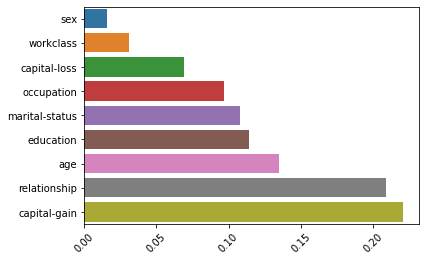

In [ ]:
sns.barplot(y=X.columns[lr.feature_importances_.argsort()], x=sorted(lr.feature_importances_))
plt.xticks(rotation=45)
plt.show()

# Deployed/Website

https://salarypredicto.herokuapp.com/

# Conclusion

The binary classifier Logestic regression gives 80.5%, but f1 scores gives only 41.5%.
HistGradientBoostingClassifier gives 86.72%, but f1 scores gives 71.29% which is a better model comparatively. The webisite is created with random classifer since HistGradientBoostingClassifier is a new algorithum there seems to some issues in sklearn.